In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc import adia_analysis

In [2]:
raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=0,initial_state='ground',sampling_rate=1e9)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)


Z_freq = np.linspace(0,-3e9,301)

raw_config.setValue('Q1 f01',6.00e9)
raw_config.setValue('Q2 f01',9e9)
raw_config.setValue('Q3 f01',5.4e9)
raw_config.setValue('Q1 Anharmonicity',-250e6)
raw_config.setValue('Q2 Anharmonicity',-300e6)
raw_config.setValue('Q3 Anharmonicity',-250e6)

raw_config.setValue('Q2 Z',Z_freq)

raw_config.setValue('g12',120e6)
raw_config.setValue('g23',100e6)
raw_config.setValue('g13',10e6)

simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=10e6)
eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')



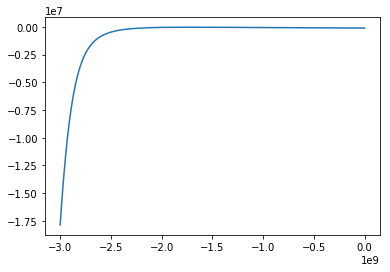

In [3]:
plt.plot(Z_freq,eigen_trace)

## zz suppress

In [4]:
def g_a(g1c,g2c,f1,f2,fc):
    delta12=f1-f2
    delta1c=f1-fc
    delta2c=f2-fc
    return g1c*g2c/2*delta12/(delta1c*delta2c)

def g_b(g1c,g2c,f1,f2,fc,alphac):
    delta12=f1-f2
    delta1c=f1-fc
    delta2c=f2-fc
    return g1c*g2c/2*alphac/(delta1c*delta2c)

def g_eff(g12,g1c,g2c,f1,f2,fc,alphac):
    delta12=f1-f2
    delta1c=f1-fc
    delta2c=f2-fc
    epsilon1c=f1+fc
    epsilon2c=f2+fc
    factor = 1/delta1c+1/delta2c-1/epsilon1c-1/epsilon2c
    return g12+g1c*g2c/2*factor

def zeta(g12,g1c,g2c,f1,f2,fc,alpha1,alpha2,alphac):
    delta12=f1-f2
    delta1c=f1-fc
    delta2c=f2-fc
    geff = g_eff(g12,g1c,g2c,f1,f2,fc,alphac)
    gb = g_b(g1c,g2c,f1,f2,fc,alphac)
    ga = g_a(g1c,g2c,f1,f2,fc) 
    return  2/(delta12-alpha2)*(geff-ga)**2-2/(delta12+alpha1)*(geff+ga)**2+4*g1c*g2c/(delta1c*delta2c)*(geff+gb)

In [5]:
def g_eff(g12,g1c,g2c,f1,f2,fc,alphac):
    delta12=f1-f2
    delta1c=f1-fc
    delta2c=f2-fc
    epsilon1c=f1+fc
    epsilon2c=f2+fc
    factor = 1/delta1c+1/delta2c-1/epsilon1c-1/epsilon2c
    return g12+g1c*g2c/2*factor

In [6]:
g13_arr = np.linspace(0,18e6,121)
fc_arr = np.linspace(6.01e9,9e9,300)

ZZ_pertur_LD = []
ZZ_pertur_ST = []

for g13 in g13_arr:
    eigens = zeta(g13,120e6,100e6,6.0e9,5.4e9,fc_arr,-250e6,-250e6,-300e6)
    ZZ_pertur_LD.append(eigens)
    
    eigens2 = zeta(g13,120e6,100e6,6.0e9,5.85e9,fc_arr,-250e6,-250e6,-300e6)
    ZZ_pertur_ST.append(eigens2)

In [7]:
Coupler_arr = np.linspace(6.5e9,9e9,801)

g13_arr_x = np.linspace(0,20e6,1601)

ST_zero = np.zeros_like(Coupler_arr)
LD_zero = np.zeros_like(Coupler_arr)

i=0
for coupler_freq in Coupler_arr:
#     ST_a = np.argmin( np.abs(g_eff(g13_arr_x,120e6,100e6,6.0e9,5.85e9,Coupler_arr,-300e6)))
    ST_zero[i] = g13_arr_x[np.argmin( np.abs(g_eff(g13_arr_x,120e6,100e6,6.0e9,5.85e9,coupler_freq,-300e6)))]
    LD_zero[i] = g13_arr_x[np.argmin( np.abs(g_eff(g13_arr_x,120e6,100e6,6.0e9,5.4e9,coupler_freq,-300e6)))]
    i+=1

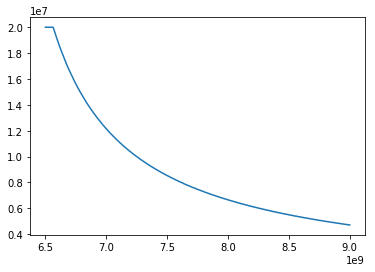

In [8]:
plt.plot(Coupler_arr,ST_zero)

In [9]:
# ZZ_TRACE_ST=[]

# g13_arr = np.linspace(0,18e6,121)

# for g13 in g13_arr:
#     raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=0,initial_state='ground',sampling_rate=1e9)
#     raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)


#     Z_freq = np.linspace(0,-3e9,301)

#     raw_config.setValue('Q1 f01',6.00e9)
#     raw_config.setValue('Q2 f01',9e9)
#     raw_config.setValue('Q3 f01',5.85e9)
#     raw_config.setValue('Q1 Anharmonicity',-250e6)
#     raw_config.setValue('Q2 Anharmonicity',-300e6)
#     raw_config.setValue('Q3 Anharmonicity',-250e6)

#     raw_config.setValue('Q2 Z',Z_freq)

#     raw_config.setValue('g12',120e6)
#     raw_config.setValue('g23',100e6)
#     raw_config.setValue('g13',g13)

#     simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
#     Simulator = Circuit_Simulator.Simulator(simu_config)
#     Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=10e6)
#     eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
    
#     print(g13)
    
#     ZZ_TRACE_ST.append(eigen_trace)

In [10]:
# np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\Appendix Perturbation\data\ZZ_diag_LD.txt',ZZ_TRACE_LD)
# np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\Appendix Perturbation\data\ZZ_diag_ST.txt',ZZ_TRACE_ST)

In [9]:
ZZ_TRACE_LD = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\Appendix Perturbation\data\ZZ_diag_LD.txt')
ZZ_TRACE_ST = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\Appendix Perturbation\data\ZZ_diag_ST.txt')

In [31]:
from matplotlib import cm
from matplotlib import *

fig = plt.figure(figsize=[8,8.4])
ax3 = fig.add_axes([0.05,0.11,0.4,0.4])
ax4 = fig.add_axes([0.46,0.11,0.4,0.4])

ax1 = fig.add_axes([0.05,0.52,0.4,0.4])
ax2 = fig.add_axes([0.46,0.52,0.4,0.4])

ax_colorbar = fig.add_axes([0.89,0.11,0.02,0.81])
# ax_colorbar = fig.add_axes([0.05,0.05,0.81,0.02])


X1,Y1 = np.meshgrid((Z_freq+9e9)[:-1]/1e9,g13_arr/1e6)
im = ax1.pcolor(X1,Y1,np.abs(np.array(ZZ_TRACE_LD)[:,:-1])/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=10e-5,vmax=100)
im = ax2.pcolor(X1,Y1,np.abs(np.array(ZZ_TRACE_ST)[:,:-1])/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=10e-5,vmax=100)

X2,Y2 = np.meshgrid(fc_arr/1e9,g13_arr/1e6)
im = ax3.pcolor(X2,Y2,np.abs(np.array(ZZ_pertur_LD)[:,:])/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=10e-5,vmax=100)
im = ax4.pcolor(X2,Y2,np.abs(np.array(ZZ_pertur_ST)[:,:])/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=10e-5,vmax=100)

# colarbar= plt.colorbar(im,cax=ax_colorbar,orientation='horizontal')
colarbar= plt.colorbar(im,cax=ax_colorbar,orientation='vertical')

ax1.contour(X1, Y1, np.abs(np.array(ZZ_TRACE_LD)[:,:-1])/1e6, levels=[1e-2,1e-1,1], colors=['tab:brown','dimgray','black'])
ax2.contour(X1, Y1, np.abs(np.array(ZZ_TRACE_ST)[:,:-1])/1e6, levels=[1e-2,1e-1,1], colors=['tab:brown','dimgray','black'])
ax3.contour(X2, Y2, np.abs(np.array(ZZ_pertur_LD)[:,:])/1e6, levels=[1e-2,1e-1,1], colors=['tab:brown','dimgray','black'])
ax4.contour(X2, Y2, np.abs(np.array(ZZ_pertur_ST)[:,:])/1e6, levels=[1e-2,1e-1,1], colors=['tab:brown','dimgray','black'])

# ax3.plot(Coupler_arr/1e9,LD_zero/1e6,'k',linewidth=2)
# ax4.plot(Coupler_arr/1e9,ST_zero/1e6,'k',linewidth=2)
ax3.set_ylim([0,18])
ax4.set_ylim([0,18])


ax1.tick_params(axis='x',which='both',top=True,bottom=True,direction='in' )
ax1.tick_params(axis='y',which='both',left=True,right=True,direction='in' )
ax2.tick_params(axis='x',which='both',top=True,bottom=True,direction='in' )
ax2.tick_params(axis='y',which='both',left=True,right=True,direction='in' )
ax3.tick_params(axis='x',which='both',top=True,bottom=True,direction='in' )
ax3.tick_params(axis='y',which='both',left=True,right=True,direction='in' )
ax4.tick_params(axis='x',which='both',top=True,bottom=True,direction='in' )
ax4.tick_params(axis='y',which='both',left=True,right=True,direction='in' )

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)
ax4.tick_params(labelsize=18)
ax_colorbar.tick_params(labelsize=18)

In [29]:
%matplotlib qt

In [27]:
# help(ax1.contour)    